# End to End Project




This checklist can guide you through your Machine Learning projects. There are eight main steps: 

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. 
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

Performance measure

+ Root Mean Square Error(RMSE)

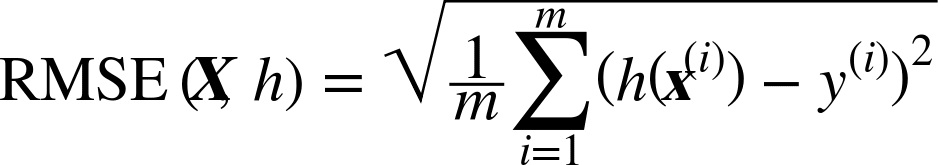

+ m is the number of instances in the dataset you are measuring the RMSE on
+ x(<sup>i</sup>) is a vector of all the feature values (excluding the label) of the ith instance in the dataset, and y(<sup>i</sup>) is its label (the desired output value for that instance).
+ X is a matrix containing all the feature values (excluding labels) of all instances in the dataset.
+ h is your system’s prediction function, also called a hypothesis
+ RMSE(X,h) is the cost function measured on the set of examples using your hypothesis h.

+ We use lowercase italic font for scalar values (such as m or y(<sup>i</sup>)) and function names (such as h), lowercase bold font for vectors (such as x(<sup>i</sup>)), and uppercase bold font for matrices (such as X).


+ Mean Absolute Error



 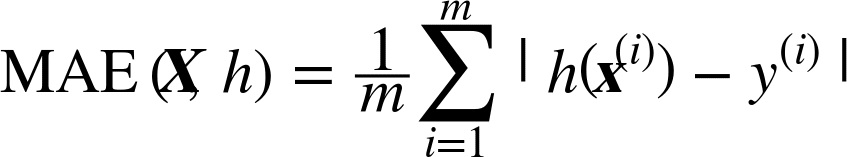

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values. Various distance measures, or norms, are possible:

+ Computing the root of a sum of squares (RMSE) corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the ℓ2 norm, noted ∥ · ∥2 (or just ∥ · ∥).

+ Computing the sum of absolutes (MAE) corresponds to the ℓ1 norm, noted ∥ · ∥1. It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

+ More generally, the ℓ<sub>k</sub> norm of a vector v containing n elements is defined as  

+ ℓ0 just gives the cardinality of the vector (i.e., the number of elements), and ℓ∞ gives the maximum absolute value in the vector.

+ The higher the norm index, the more it focuses on large values and neglects small ones. 

+ This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.



**It is preferable to create a small function to do that. It is useful in particular if
data changes regularly, as it allows you to write a small script that you can run whenever you need to
fetch the latest data (or you can set up a scheduled job to do that automatically at regular intervals).
Automating the process of fetching the data is also useful if you need to install the dataset on multiple
machines.**

In [60]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [61]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## Taking a quick look at the data



In [62]:
fetch_housing_data()

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**The info() method is useful to get a quick description of the data, in particular the total number of rows,
and each attribute’s type and number of non-null values**

In [63]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The 'ocean_proximity' field is categorical. To find all the categories that exists we can do -

In [64]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [65]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


+ Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640).

+ The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. 

+ For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each
numerical attribute

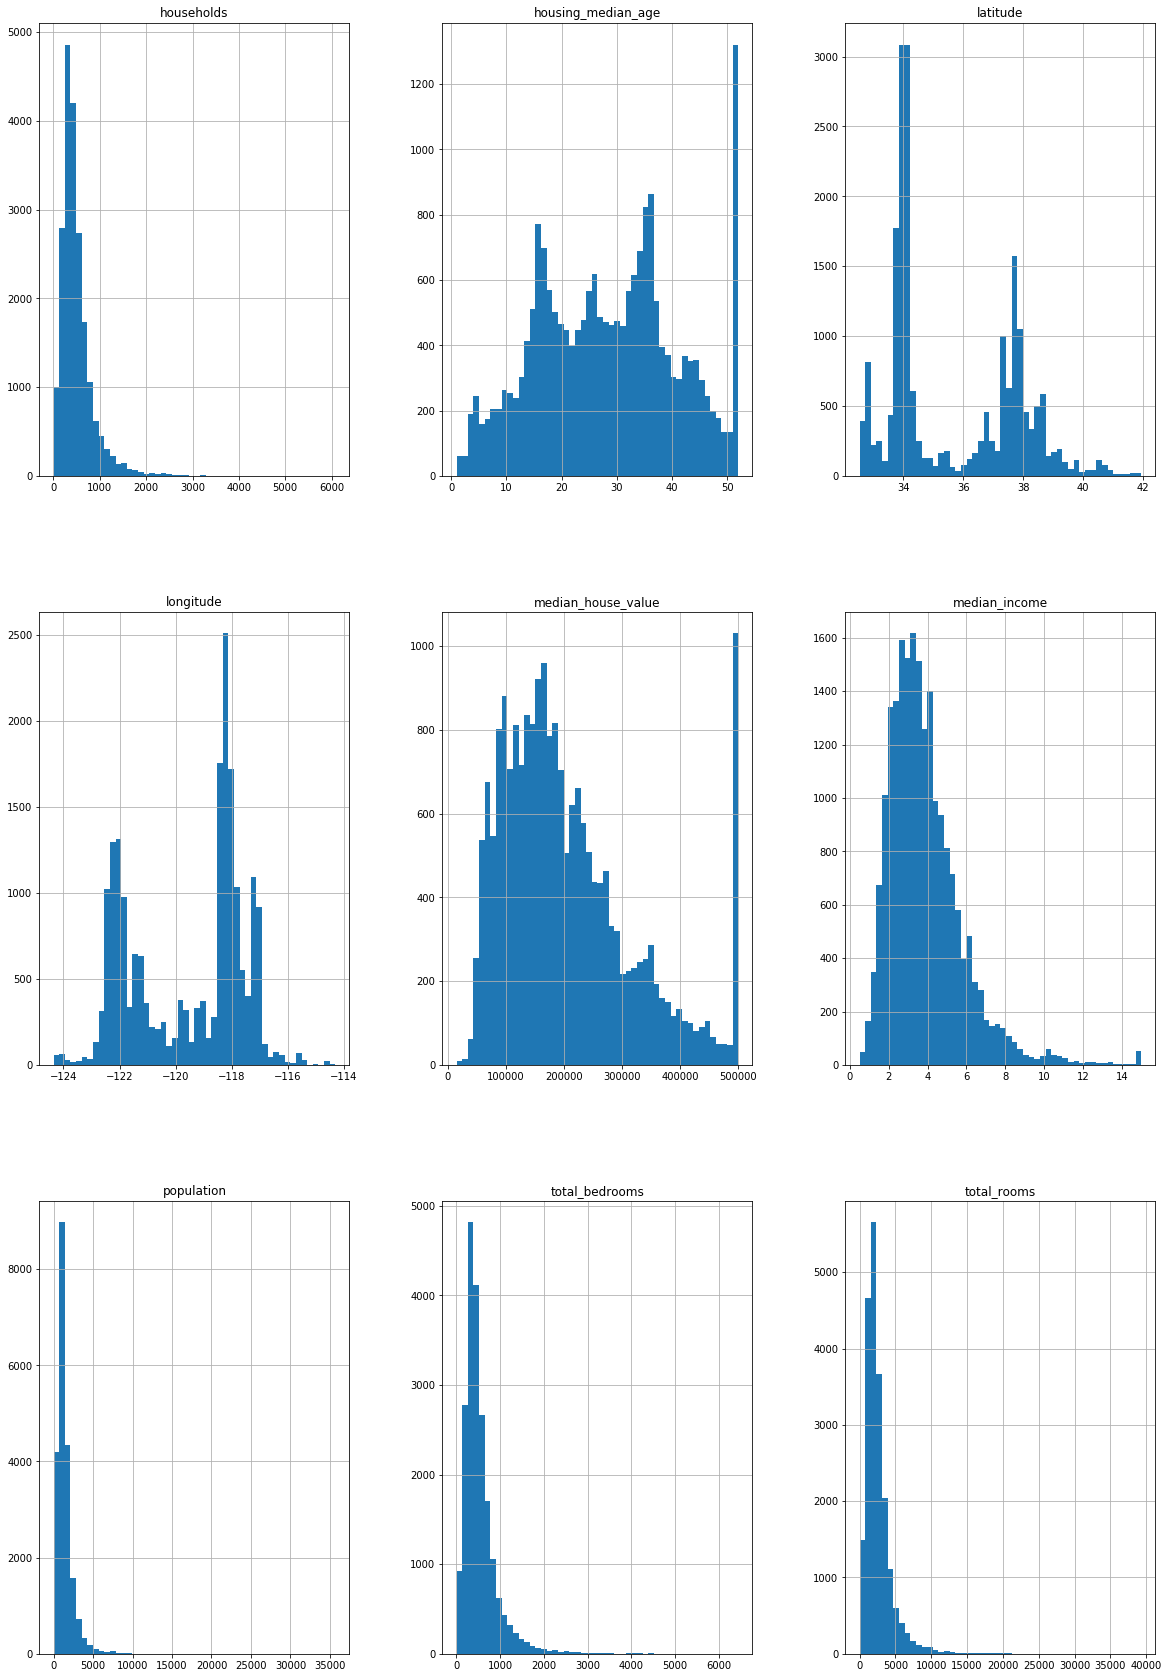

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 30))
plt.show()

Don't look at the data much, When you estimate the generalization error using the test set, your estimate will be too optimistic and you
will launch a system that will not perform as well as expected. This is called data snooping bias.


**Creating a test and train set**

In [67]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


## Stratified Sampling


So far we have considered purely random sampling methods. This is generally fine if your dataset is large
enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a
significant sampling bias. When a survey company decides to call 1,000 people to ask them a few
questions, they don’t just pick 1,000 people randomly in a phone booth. They try to ensure that these 1,000
people are representative of the whole population. For example, the US population is composed of 51.3%
female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the
sample: 513 female and 487 male. This is called stratified sampling: the population is divided into
homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to
guarantee that the test set is representative of the overall population.


+ It is important to have a sufficient number of instances in your dataset for **each stratum**, or else the estimate of the stratum’s importance may be biased. 
+ This means that you should not have too many strata, and each stratum should be large enough.

The following code 
+ creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and
+ rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5

In [68]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
# inplace = True -  i.e doing assignment and computation in a single statement using “operator” module, ie housing is modified
# .where the actual value where the condition is true and 5 if the value is false
housing["income_cat"].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
# StratifiedShuffleSplit - Provides train/test indices to split data in train/test sets.
housing["income_cat"].value_counts() / len(housing)



3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

Now you should remove the income_cat attribute so the data is back to its original state:


In [70]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)
    
# inplace = True, -  i.e doing assignment and computation in a single statement using “operator” module. ie sets changed

First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so you can just work directly on the full set. Let’s create a copy so you can play with it without harming the training set:

In [71]:
housing = strat_train_set.copy()

## Visualizing Geographical Data



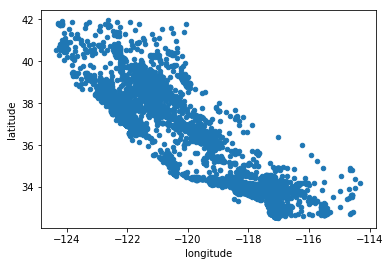

In [72]:
housing.plot(kind='scatter', x="longitude", y="latitude")

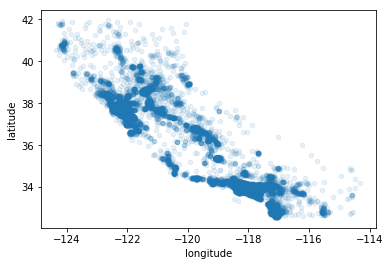

In [73]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1)

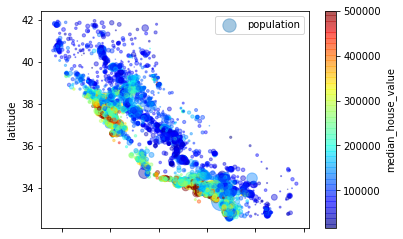

In [74]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

## Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:


In [75]:
corr_matrix = housing.corr()

In [76]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. 
+ **When it is close to 1**, it means that there is a **strong positive correlation**; 
    for example, the median house value tends to go up when the median income goes up.
+ **When the coefficient is close to –1**, it means that there is a **strong negative correlation**;
    you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north).
+ Finally, **coefficients close to zero** mean that there is **no linear correlation**

**The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to zero then y generally goes up”).**

/Users/shahrukh/Code/Home/Machine_Learning/env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116fa2518>,
      dtype=object)

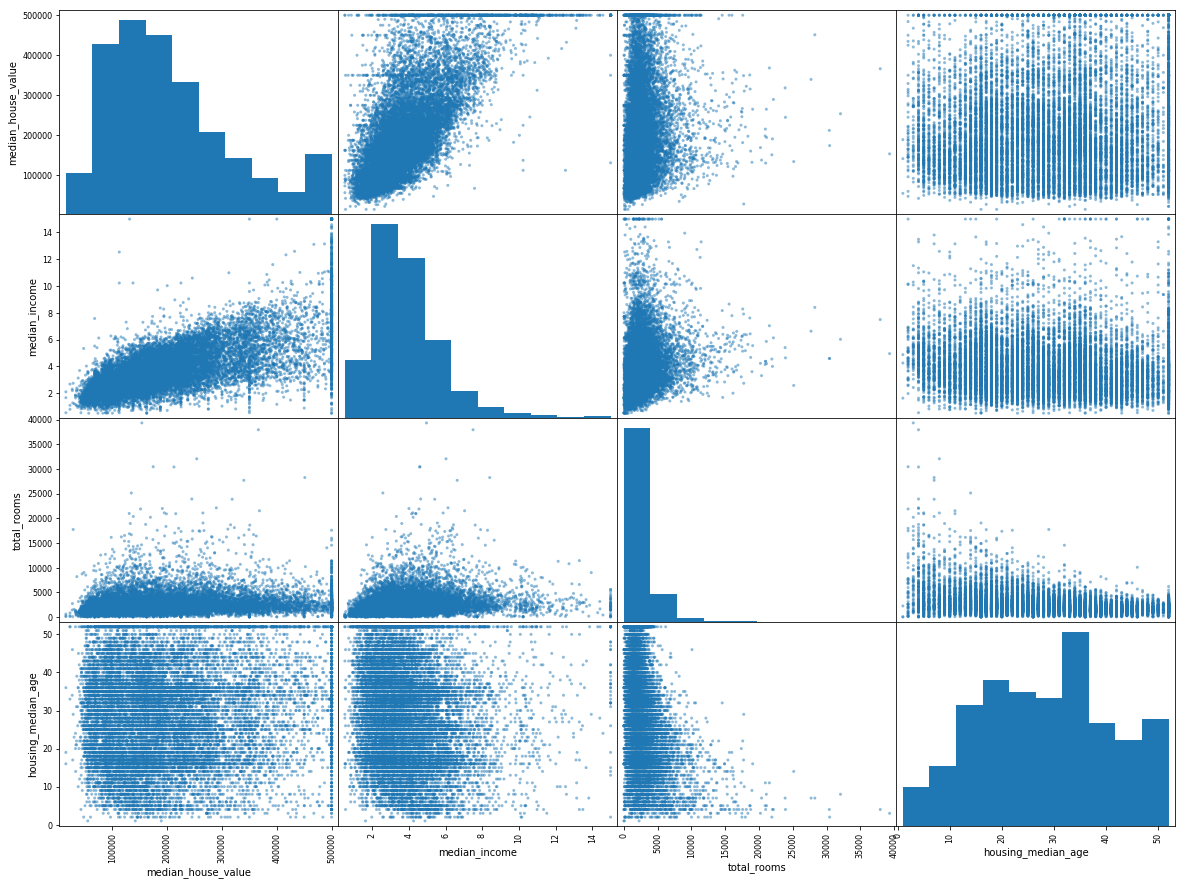

In [77]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(20, 15))

The main diagonal (top left to bottom right) would be full of straight lines if Pandas plotted each variable against itself, which would not be very useful. So instead Pandas displays a histogram of each attribute


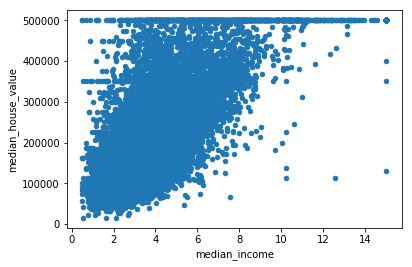

In [78]:
housing.plot(kind='scatter', x='median_income', y='median_house_value')


## Experimenting with Attribute Combinations




In [79]:

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [80]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Preparing the data for the ML algotithms



It’s time to prepare the data for your Machine Learning algorithms. Instead of just doing this manually, you should write functions to do that, for several good reasons:
+ This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).
+ You will gradually build a library of transformation functions that you can reuse in future projects.
+ You can use these functions in your live system to transform the new data before feeding it to your algorithms.
+ This will make it possible for you to easily try various transformations and see which combination of transformations works best.


In [81]:
housing = strat_train_set.drop("median_house_value", axis=1) # .drop creates the copy of the data , strat_train_set not effected
housing_labels = strat_train_set["median_house_value"].copy()


### Data Cleaning


Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. You noticed earlier that the **total_bedrooms attribute** has some missing values, so
let’s fix this. You have three options:
+ Get rid of the corresponding districts.
+ Get rid of the whole attribute.
+ Set the values to some value (zero, the mean, the median, etc.).


In [82]:
# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median) # option 3 filling with median




Don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data.


Scikit-Learn provides a handy class to take care of missing values: 
**Imputer**.

Here is how to use it.
+ First, you need to create an Imputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

+ Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity:


In [83]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')


housing_num = housing.drop('ocean_proximity', axis=1)

Now you can fit the imputer instance to the training data using the fit() method:


In [84]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

+ The imputer has simply computed the **median of each attribute** and stored the result in its **statistics_** instance variable. 
+ Only the **total_bedrooms** attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:


In [85]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [86]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now you can use this “trained” imputer to transform the training set by replacing missing values by the learned medians:

In [87]:
X = imputer.transform(housing_num)

The result is a plain Numpy array containing the transformed features. If you want to put it back into a
Pandas DataFrame, it’s simple:

In [88]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)


                                  ###  SCIKIT-LEARN DESIGN

Scikit-Learn’s API is remarkably well designed. The main design principles are:16 Consistency. All objects share a consistent and simple interface:

+ **Estimators**. Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the **fit() method**, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). **Any other parameter needed to guide the estimation process is considered a hyperparameter (such as an imputer’s strategy)**, and it must be set as an instance variable (generally via a constructor parameter).

+ **Transformers**. Some estimators (such as an imputer) can also **transform** a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the **transform()** method with the dataset to transform as a parameter. It returns the transformed dataset. **This transformation generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).**

+ **Predictors**. Finally, some estimators are capable of making predictions given a dataset; they are called **predictors**. For example, the LinearRegression model in the previous chapter was a predictor: it predicted life satisfaction given a country’s GDP per capita. A predictor has a **predict()** method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a **score() method that measures the quality of the predictions given a test set (and the corresponding labels in the case of supervised learning algorithms)**

+ **Inspection**. All the estimator’s hyperparameters are accessible directly via public instance variables (e.g.,imputer.strategy), and all the estimator’s learned parameters are also accessible via public instance variables **with an underscore suffix (e.g., imputer.statistics_).**

+ **Nonproliferation of classes**. Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

+ **Composition**. Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator, as we will see.

+ **Sensible defaults**. Scikit-Learn provides reasonable default values for most parameters, making it easy to create a baseline working system quickly.
 

## Handling Text and Categorical Attributes


Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these text labels to numbers.



In [89]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded
# <1H OCEAN” is mapped to 0, “INLAND” is mapped to 1, etc.

array([0, 0, 4, ..., 1, 0, 3])

In [90]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


+ One issue with this representation is that **ML algorithms will assume that two nearby values are more similar than two distant values**.

+ Obviously this is not the case (for example, categories 0 and 4 are more similar than categories 0 and 1).

+ To fix this issue, a common solution is to create one binary attribute per category:
    + one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise)
    + another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on.

+ This is called **one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold)**.

+ Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors. Let’s encode the categories as one-hot vectors. Note that fit_transform() expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it:18


In [91]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>


Notice that the output is a SciPy sparse matrix, instead of a NumPy array.
+ This is very useful when you have **categorical attributes** with thousands of categories.

+ After one-hot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for one 1 per row.

+ Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements.

+ You can use it mostly like a normal 2D array,19 but if you really want to convert it to a (dense) NumPy array, just call the toarray() method:

In [92]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the **LabelBinarizer class**:




In [93]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])


Note that this returns a **dense NumPy array by default**.
You can get a sparse matrix instead by passing **sparse_output=True** to the **LabelBinarizer constructor**.

## Custom Transformations

You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: 
+ fit() (returning self), 
+ transform()
+ and fit_transform()

You can get the last one for free by simply adding
**TransformerMixin as a base class**.

Also, if you add **BaseEstimator as a base class (and avoid *args
and **kargs in your constructor)** you will get two extra methods (get_params() and set_params())
that will be useful for automatic hyperparameter tuning.

For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True): # no *args and **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)



In this example the transformer has one hyperparameter, **add_bedrooms_per_room, set to True** by default
(it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

## Feature Scaling  

With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. 

Note that scaling the target values is generally not required.

You can do feature scaling basically in two ways : 


+ **Min-max scaling (many people call this normalization)** is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1.
    + We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this.
    + It has a **feature_range** hyperparameter that lets you change the range if you don’t want 0–1 for some reason.
 
+ **Standardization is quite different**: 
    + first it subtracts the mean value (so standardized values always have a zero mean),
    + and then it divides by the variance so that the resulting distribution has unit variance. 
    + Unlike **min-max scaling**, **standardization** does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). 
    + However, standardization is much less affected by outliers.
    
For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0– 0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.

## Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. 

Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations.
Here is a small pipeline for the numerical attributes:




In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attrs_addr', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])


+ The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps.

+ All but the last estimator must be transformers (i.e., they must have a fit_transform() method).

+ The names can be anything you like.

When you call the **pipeline’s fit() method**, it calls **fit_transform()** sequentially on all transformers,
passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the **fit() method**.


**How can you join these transformations into a single pipeline?**

Scikit-Learn provides a **FeatureUnion class** for this. You give it a list of transformers (which can be entire transformer pipelines), and when its transform() method is called it runs each transformer’s transform() method
in parallel, waits for their output, and then concatenates them and returns the result (and of course calling its fit() method calls all each transformer’s fit() method). A full pipeline handling both numerical and
categorical attributes may look like this:



Each subpipeline starts with a selector transformer: it simply transforms the data by selecting the desired attributes (numerical or categorical), dropping the rest, and converting the **resulting DataFrame to a NumPy array**.

There is nothing in Scikit-Learn to handle Pandas DataFrames, so we need to write a simple custom transformer for this task:

In [96]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [97]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.loc[:, self.attribute_names].values
        

In [99]:
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
     ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

And you can run the whole pipeline simply:


In [100]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [101]:
housing_prepared.shape

(16512, 16)

#### Select and Train a model

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

/Users/shahrukh/Code/Home/Machine_Learning/env/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849878]


In [104]:
print("Labels:\t\t", list(some_labels))

Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [107]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

this is better than nothing but clearly not a great score: most districts’ median_housing_values
range between $120,000  and  $265,000, so a typical prediction error of $68,628 is not very satisfying.

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [109]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course, it is much more
likely that the model has badly overfit the data. How can you be sure? As we saw earlier, you don’t want
to touch the test set until you are ready to launch a model you are confident about, so you need to use part
of the training set for training, and part for model validation.

### Better Evaluation Using Cross-Validation

In [110]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([69745.72080246, 67857.69609927, 71117.38520258, 70204.21461109,
       69948.26883797, 76176.7136779 , 71253.08275081, 70186.63810891,
       77932.69895007, 69030.30977682])

In [112]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [69745.72080246 67857.69609927 71117.38520258 70204.21461109
 69948.26883797 76176.7136779  71253.08275081 70186.63810891
 77932.69895007 69030.30977682]
Mean: 71345.27288178762
Standard deviation: 3024.4721166553354


But cross-validation comes at the cost of training
the model several times, so it is not always possible.

In [113]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70361.18285107 74742.02420674
 68022.09224176 71193.07033936 64969.63056405 68276.69992785
 71543.69797334 67665.10082067]
Mean: 69051.63554357362
Standard deviation: 2732.3913087537303


That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear
Regression model. 

In [115]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21941.911027380233

In [116]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51650.94405471 48920.80645498 52979.16096752 54412.74042021
 50861.29381163 56488.55699727 51866.90120786 49752.24599537
 55399.50713191 53309.74548294]
Mean: 52564.19025244012
Standard deviation: 2301.873803919754


You should save every model you experiment with, so you can come back easily to any model you want. Make sure you save
both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as
well. This will allow you to easily compare scores across model types, and compare the types of errors they make. You can
easily save Scikit-Learn models by using Python’s pickle module, or using sklearn.externals.joblib, which is more efficient
at serializing large NumPy arrays:


In [120]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

NameError: name 'my_model' is not defined

### Fine tune your model

All you need to do is tell it which
hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the
possible combinations of hyperparameter values, using cross-validation. 

For example, the following code
searches for the best combination of hyperparameter values for the RandomForestRegressor:

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

**When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown in this example with the n_estimators hyperparameter).**

This **param_grid** tells Scikit-Learn to 
+ first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict,
+ then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to False instead of True (which is the default value for this hyperparameter).



+ All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values, 
+ and it will train each model five times (since we are using five-fold cross validation). 
+ In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like this:

In [122]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Since 30 is the maximum value of n_estimators that was evaluated, you should probably evaluate higher values as well, since
the score may continue to improve.

In [123]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it
retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance.

In [124]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64293.909666228385 {'max_features': 2, 'n_estimators': 3}
55982.34770754144 {'max_features': 2, 'n_estimators': 10}
52917.50205376098 {'max_features': 2, 'n_estimators': 30}
60217.710073091075 {'max_features': 4, 'n_estimators': 3}
53035.93216729305 {'max_features': 4, 'n_estimators': 10}
50692.14941428453 {'max_features': 4, 'n_estimators': 30}
59230.57820722866 {'max_features': 6, 'n_estimators': 3}
52153.9008180945 {'max_features': 6, 'n_estimators': 10}
50179.07663106693 {'max_features': 6, 'n_estimators': 30}
59315.55390225387 {'max_features': 8, 'n_estimators': 3}
51965.81241886712 {'max_features': 8, 'n_estimators': 10}
50019.487655870886 {'max_features': 8, 'n_estimators': 30}
62605.46569533382 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54040.519785924196 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59477.68311171431 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53121.61423062031 {'bootstrap': False, 'max_features': 3, 'n_estimators':

### Randomized Search

+ The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use **RandomizedSearchCV** instead.

+ This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. This approach has two main benefits:
    + If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
    + You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations

In [125]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x115f22390>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x115f22198>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [126]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49147.15241724505 {'max_features': 7, 'n_estimators': 180}
51396.876896929905 {'max_features': 5, 'n_estimators': 15}
50797.05737322649 {'max_features': 3, 'n_estimators': 72}
50840.744513982805 {'max_features': 5, 'n_estimators': 21}
49276.17530332962 {'max_features': 7, 'n_estimators': 122}
50775.46331678437 {'max_features': 3, 'n_estimators': 75}
50681.383924974936 {'max_features': 3, 'n_estimators': 88}
49612.152530468346 {'max_features': 5, 'n_estimators': 100}
50473.01751424941 {'max_features': 3, 'n_estimators': 150}
64458.25385034794 {'max_features': 5, 'n_estimators': 2}


In [127]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.39619264e-02, 5.83018377e-02, 4.47290921e-02, 1.53687951e-02,
       1.51281791e-02, 1.63039883e-02, 1.52634729e-02, 3.78069443e-01,
       6.17589925e-02, 1.09829569e-01, 5.39316250e-02, 4.73751113e-03,
       1.57252410e-01, 1.18061075e-04, 1.89278249e-03, 3.35231355e-03])

In [128]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.378069443135786, 'median_income'),
 (0.15725241006292914, 'INLAND'),
 (0.10982956941580975, 'pop_per_hhold'),
 (0.06396192638058122, 'longitude'),
 (0.061758992502951505, 'rooms_per_hhold'),
 (0.058301837712694676, 'latitude'),
 (0.053931624989639625, 'bedrooms_per_room'),
 (0.04472909206416924, 'housing_median_age'),
 (0.016303988331327894, 'population'),
 (0.015368795110354496, 'total_rooms'),
 (0.015263472943856219, 'households'),
 (0.015128179114574095, 'total_bedrooms'),
 (0.004737511126046146, '<1H OCEAN'),
 (0.003352313546038243, 'NEAR OCEAN'),
 (0.001892782487937827, 'NEAR BAY'),
 (0.00011806107530399016, 'ISLAND')]

### Evaluate  your system on the test set




In [129]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [130]:
final_rmse

48313.90035138161